# Bitácora 2 - Difracción de Electrones

## Datos básicos


Universdad de los Andes, Bogotá, Colombia


Sesión 1: 30 de agosto de 2024 (16:00 - 18:00)

Sesión 2: 6 de septiembre de 2024 (17:000 - 18:00)


Integrante: Juan Sebastián Sánchez / Número de estudiante: blabla bla / Número de celular: 3002287930.

Integrante: Juan José Guzmán / Número de estudiante: 202214541 / Número de celular: 3054457204.



Grupo 5 - Laboratorio Intermedio - Sección 2


## Objetivos del día y expectativas

De forma general, se quiere observar la dualidad onda-partícula en electrones por medio de difracción de Debye-Scherrer, verificar la validez de la ecuación de de Broglie para la longitud de onda de los electrone y medir experimentalmente las distancias reticulares interplanares para el grafito.

Especificamente, se formará un patrón de difracción en forma de dos anillos concéntricos y se tomarán medidas de sus diámetros para cada valor de voltaje para calcular y comparar la longitud de onda de De Broglie y la longitud de onda de Bragg. Adicionalmente, con estos datos se busca estimar experimentalmente las primeras dos distancias reticulares interplanares y la constante de Planck.

## Marco teórico (preinforme)

El efecto fotoeléctrico y la ley de Planck fueron la base de la dualidad onda-partícula. En el efecto fotoeléctrico se propone que la energía de los fotones viene dada por la ecuación $E = h\nu$; se observa una clara relación entre $E$ y la frecuencia $\nu$, propiedades que anteriormente se creían incompatibles ya que la energía se relacionaba con las partículas y la frecuencia a las ondas. Esta dualidad entre onda y partícula llevaron a De Broglie a proponer que todas las partículas elementales muestran un comportamiento ondulatorio. Para una partícula con momento $p$ se le asocia una longitud de onda $\lambda$ mediante la ecuación $\lambda=\frac{h}{p}$.

Para el experimento, se trabajará con electrones y voltajes para poder acelerarlos. Por esta razón se hace uso de la conservación de la energía para calcular la longitud de onda de los electrones.

\begin{equation}
    eV = \frac{p^2}{2m_e} = \frac{h^2}{2m_e \lambda^2}
\end{equation}
De esta ecuación se puede despejar $\lambda$.

\begin{equation}
    \lambda = \frac{h}{\sqrt{2eVm_e}}
\end{equation}

De la anterior ecuación podemos obtener longitudes de onda del orden de pico metros con tan solo algunos kilovoltios. Este tamaño es ideal para el experimento ya que las distancias entre átomos de un cristal son cercanas a este orden de magnitud, por lo cual, se puede estudiar la naturaleza ondulatoria de los electrones que inciden en la red cristalina.

Al momento en que los electrones inciden sobre el cristal, estos se difractan siguiendo la ley de Bragg de manera especular, es decir, se reflejan con el mismo ángulo en el que inciden. Este efecto genera un patrón de interferencia cuando se considera una red cristalina y las diferentes reflexiones interfieren entre ellas constructivamente. Para que la interferencia sea constructiva el camino adicional recorrido por la onda del plano inferior debe cumplir la siguiente ecuación:

\begin{equation}
    2d_i \sin{\theta} = n\lambda
\end{equation}

Esta ecuación es válida para $\lambda \leq 2d_i$, conocida como la ley de Bragg.

Para esta práctica el material cristalino será grafito. Este se estructura en forma de hexágono con distancias interplanares $d_i$. Los cristales están orientados de manera aleatoria con el fin de encontrar un plano con una inclinación que permita obtener interferencia constructiva y sea posible ver el patrón de interferencia en una pantalla.

## Metodología experimental

Los componentes básicos son: Tubo de difracción de electrones donde estará la muestra de grsfito, fuente de alto voltaje de 10kV para controlar la aceleración de los electrones, 6 cables para las conexiones, un soporte para el tubo y un calibrador.

El montaje consta de dos configuraciones, una permite observar la muestra de grafito amplificada y la otra permite observar el patrón de difracción.


Configuración 1


Lo primero es insertar el tubo de difracción de electrones en el soporte correspondiente y tener cuidado al manipularlo debido a la delicadeza de este. Luego, es necesario identificar las ranuras F1, F2,  C (cátodo), X (electrodo de enfoque) y A (ánodo) para conectarles cables siguiendo la figura anterior. Con esto, se consigue que los electrones se desprendan por termo-ionización.

Es importante mencionar que no se debe superar los 3kV ni trabajar por periodos largos de tiempo. Una vez observada la geometría de la muestra, tomar una fotografía.

En esta parte del montaje se responderán preguntas relacionadas al funcionamiento del sistema, a la descripción de lo que se observa, a los microscopios electrónicos de transmisión y al porqué no se observa un patrón de difracción.


Configuración 2

Las conexiones cambian con el fin de observar el patrón de difracción y se muestran en la figura anterior. Cuando las conexiones estén listas, toca empezar a aumentar el voltaje lentamente hasta llegar a 3kV. En este caso, se observarán dos anillos concéntricos, cuyos diámetros cambian según el voltaje. Se tienen que medir los diámetros de estos anillos, junto con su voltaje correspondiente. Se recomienda no pasar los 5kV porque empiezan a formarse rayos X.

Las preguntas se dividen en dos actividades. En la primera actividad se pide reportar cada diámetro con su voltaje, medir el ancho de cada anillo para cada voltaje, comparar la longitud de onda de De Broglie con la longitud de onda de Bragg, describir los cambios en los diámetros debido a un imán, calcular el diámetro de los demás anillos no visibles y mostrar las condiciones para que se observe difracción.

En la segunda actividad se pide hacer gráficas del diámetro contra el inverso de la raíz cuadrada de V y hacerle una regresión lineal para calcular las distancias interplanares $d_1$ y $d_2$. También se pide estimar la constante de Planck con los datos que se obtuvieron experimentalmente.

## Ubicación de los datos tomados

In [2]:
%pip install uncertainties

     ---------------------------------------- 58.3/58.3 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import uncertainties as unc

def linear_function(X, a, b):
    return a * X + b

In [5]:
D1 = np.array([30.75,28.85,27.7,26.4,25.85,25.3,24.5,24.1,23.35,23.25,22.45])
D2 = np.array([52.25,49.7,48.15,46.1,45.45,44.4,42.9,41.9,40.6,40.5,39.8])
Espesor1 = np.array([1.5,1,1.1,0.98,0.85,1.5,1.15,1.1,1,1.1,1.2])
Espesor2 = np.array([2,1.6,1.3,1.4,1.2,1.3,1.4,1.4,1.4,1.15,1.3])
V = np.array([3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5])
sigmaV = np.array([0.1]*len(V))

In [6]:
m = 9.11e-31 #kg
e = 1.6e-19 #C
h = 6.626e-34 #Js
d1 = 213 #pm
d2 = 123 #pm
L = 0.135e3 #mm

braggD1 = 2*d1*np.sin(0.5*np.arctan(D1/(2*L)))
braggD2 = 2*d2*np.sin(0.5*np.arctan(D2/(2*L)))
broglie = (h/np.sqrt(2*e*m*V*1e3))*1e12

sigma_braggD1 = 0.5*np.sqrt( np.cos(0.5*np.arctan(D1/(2*L)))**2 / (D1**2 + 4*L**2)**2 )*L*d1*Espesor1
sigma_braggD2 = 0.5*np.sqrt( np.cos(0.5*np.arctan(D2/(2*L)))**2 / (D2**2 + 4*L**2)**2 )*L*d2*Espesor2
sigma_broglie = 0.25*np.sqrt(2)*(h*sigmaV*(1e3)/np.sqrt(e*m*(V*1e3)**3))*1e12

sigma_braggD1, sigma_braggD2,sigma_broglie

(array([0.29157598, 0.19471977, 0.21440441, 0.19122015, 0.16592708,
        0.29293848, 0.22472309, 0.21501648, 0.19557606, 0.21514902,
        0.23483952]),
 array([0.21855348, 0.17552074, 0.14293385, 0.15437442, 0.13243901,
        0.14367884, 0.15503586, 0.15523386, 0.15548496, 0.12773542,
        0.14451908]),
 array([0.37342671, 0.3389708 , 0.30950586, 0.28407532, 0.26194606,
        0.24254776, 0.22543084, 0.21023656, 0.19667561, 0.18451233,
        0.17355305]))

In [7]:
DataFrame = pd.DataFrame({'D1 [mm]':D1,'D2 [mm]':D2,'Espesor1 [mm]':Espesor1,
                          'Espesor2 [mm]':Espesor2,'V [kV]':V,"Sigma V [kV]":sigmaV,
                          "λ Bragg D1 [pm]":braggD1, "λ Bragg D2 [pm]":braggD2, "λ Broglie [pm]":broglie})
DataFrame

,D1 [mm],D2 [mm],Espesor1 [mm],Espesor2 [mm],V [kV],Sigma V [kV],λ Bragg D1 [pm],λ Bragg D2 [pm],λ Broglie [pm]
0,30.75,52.25,1.50,2.00,3.0,0.1,24.141320,23.476366,22.405602
1,28.85,49.70,1.00,1.60,3.2,0.1,22.662712,22.359567,21.694131
2,27.70,48.15,1.10,1.30,3.4,0.1,21.766554,21.678650,21.046399
3,26.40,46.10,0.98,1.40,3.6,0.1,20.752457,20.775754,20.453423
4,25.85,45.45,0.85,1.20,3.8,0.1,20.323093,20.488930,19.907900
5,25.30,44.40,1.50,1.30,4.0,0.1,19.893542,20.025064,19.403821
6,24.50,42.90,1.15,1.40,4.2,0.1,19.268415,19.361274,18.936190
7,24.10,41.90,1.10,1.40,4.4,0.1,18.955710,18.918031,18.500817
8,23.35,40.60,1.00,1.40,4.6,0.1,18.369141,18.340980,18.094156
9,23.25,40.50,1.10,1.15,4.8,0.1,18.290907,18.296553,17.713184


In [8]:
Vnew = V**(-1/2)
sigmaVnew = sigmaV*V**(-3/2)/2
popt1, pcov1 = curve_fit(linear_function, Vnew, D1, sigma=Espesor1, absolute_sigma=True)
popt2, pcov2 = curve_fit(linear_function, Vnew, D2, sigma=Espesor2, absolute_sigma=True)

Text(0, 0.5, 'Espesor (mm)')

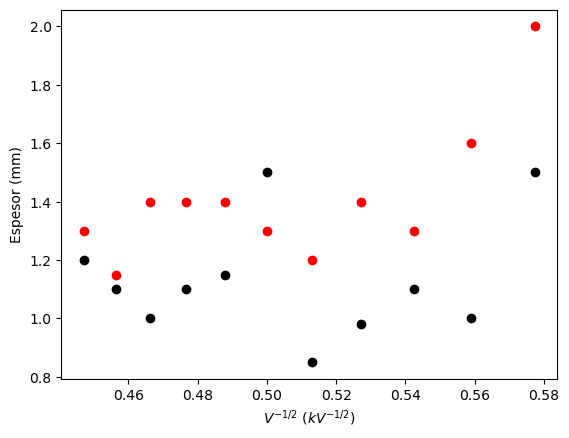

In [9]:
plt.scatter(Vnew,Espesor1,color="black",label="Espesor D1")
plt.scatter(Vnew,Espesor2,color="red", label="Espesor D2")
plt.xlabel('$V^{-1/2}$ ($kV^{-1/2}$)')
plt.ylabel('Espesor (mm)')

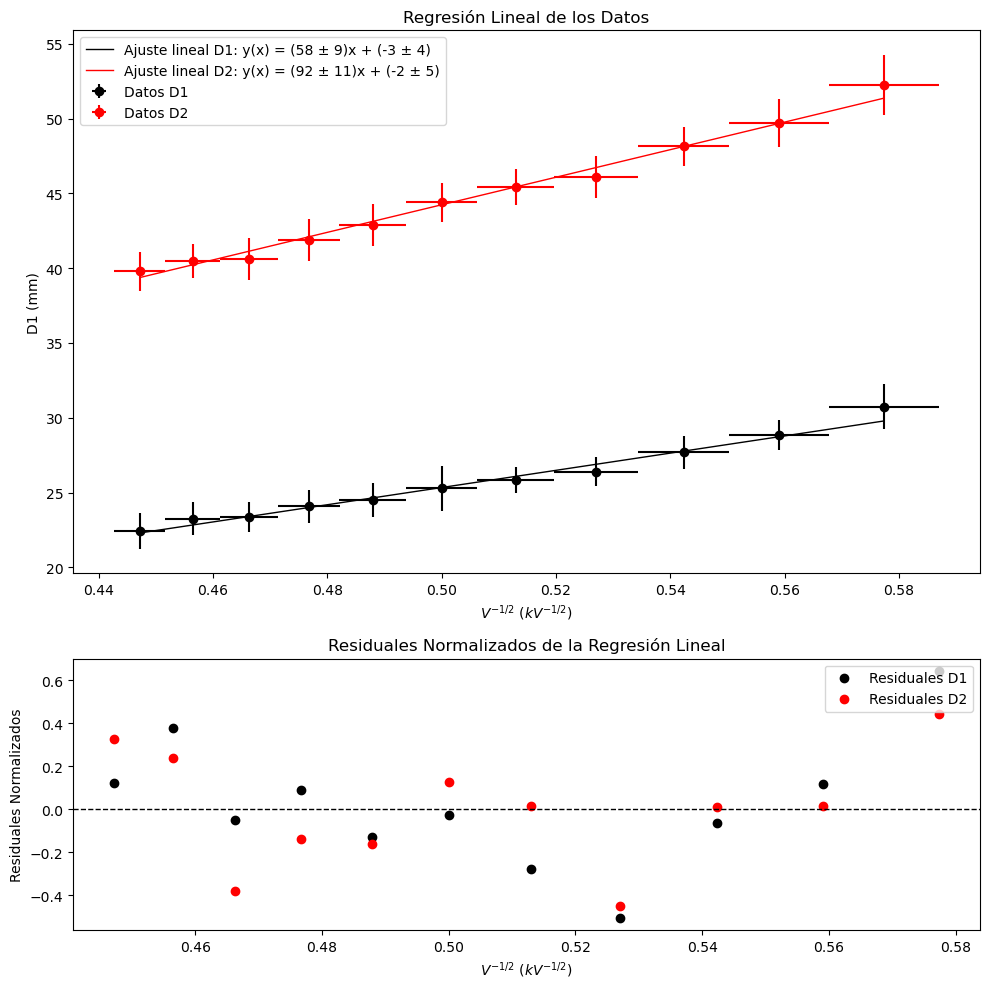

In [10]:
slope1 = popt1[0]
intercept1 = popt1[1]

slope_std_err1 = np.sqrt(pcov1[0, 0])
intercept_std_err1 = np.sqrt(pcov1[1, 1])

Y_pred = linear_function(Vnew, *popt1)
residuals = (D1 - Y_pred)/Espesor1


slope2 = popt2[0]
intercept2 = popt2[1]

slope_std_err2 = np.sqrt(pcov2[0, 0])
intercept_std_err2 = np.sqrt(pcov2[1, 1])

Y_pred2 = linear_function(Vnew, *popt2)
residuals2 = (D2 - Y_pred2)/Espesor2

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

ax1.errorbar(Vnew, D1, yerr= Espesor1,xerr=sigmaVnew,  fmt='o', label='Datos D1', color="black")
ax1.errorbar(Vnew, D2, yerr= Espesor2,xerr=sigmaVnew,  fmt='o', label='Datos D2', color="red")
ax1.plot(Vnew, Y_pred, color='black', linewidth=1, label=f'Ajuste lineal D1: y(x) = ({slope1:.0f} ± {slope_std_err1:.0f})x + ({intercept1:.0f} ± {intercept_std_err1:.0f})')
ax1.plot(Vnew, Y_pred2, color='red', linewidth=1, label=f'Ajuste lineal D2: y(x) = ({slope2:.0f} ± {slope_std_err2:.0f})x + ({intercept2:.0f} ± {intercept_std_err2:.0f})')

ax1.set_xlabel('$V^{-1/2}$ ($kV^{-1/2}$)')
ax1.set_ylabel('D1 (mm)')
ax1.legend(loc='upper left')
ax1.set_title('Regresión Lineal de los Datos')

# Plot normalized residuals
ax2.scatter(Vnew, residuals, color='black', alpha=1, label='Residuales D1')
ax2.scatter(Vnew, residuals2, color='red', alpha=1, label='Residuales D2')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('$V^{-1/2}$ ($kV^{-1/2}$)')
ax2.set_ylabel('Residuales Normalizados')
ax2.legend(loc='upper right')
ax2.set_title("Residuales Normalizados de la Regresión Lineal")

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Weighted_linear_regression_with_normalized_residuals_curve_fit.pdf', format='pdf')
plt.show()

In [29]:
d1_exp = ( 2*L*1e-3*h / (slope1*(np.sqrt(1000)/1e3)*np.sqrt(2*e*m)) )*1e12
sigma_d1_exp = ( 2*L*1e-3*h /np.sqrt(2*e*m) )*(slope_std_err1/slope1**2)/(np.sqrt(1000)/1e3)*1e12
d1_err = (213-d1_exp) / sigma_d1_exp
d1_inc = sigma_d1_exp/d1_exp
print('Valor experimental D1: {0:.0f}, Incertidumbre: {1:.0f}, Error: {2:.4}, Incertidumbre porcentual: {3:.4}'.format(d1_exp,sigma_d1_exp,d1_err,d1_inc))

Valor experimental D1: 182, Incertidumbre: 27, Error: 1.135, Incertidumbre porcentual: 0.1489


In [12]:
d2_exp = ( 2*L*1e-3*h / (slope2*(np.sqrt(1000)/1e3)*np.sqrt(2*e*m)) )*1e12
sigma_d2_exp = ( 2*L*1e-3*h /np.sqrt(2*e*m) )*(slope_std_err2/slope2**2)/(np.sqrt(1000)/1e3)*1e12
d2_exp, sigma_d2_exp

(113.74458516215483, 13.466039860758684)

In [13]:
h_1 = slope1*(np.sqrt(1000)/1e3)*d1*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)
sigmah_1 = slope_std_err1*(np.sqrt(1000)/1e3)*d1*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)
h_1, sigmah_1

(7.745945192798268e-34, 1.153026363230111e-34)

In [14]:
h_2 = slope2*(np.sqrt(1000)/1e3)*d2*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)
sigmah_2 = slope_std_err2*(np.sqrt(1000)/1e3)*d2*1e-12*np.sqrt(2*e*m)/(2*L*1e-3)
h_2, sigmah_2

(7.165158665251052e-34, 8.482716962515606e-35)